# 🎬 Análisis de Películas de una Plataforma de Streaming

## Imports


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)



## Carga de datos

In [ ]:
df = pd.read_csv("../data/movies.csv")


Para verificar la carga:

In [ ]:
df.head()


,id,title,release_date,overview,popularity,vote_average,vote_count
0,11216,Cinema Paradiso,1988-11-17,"A filmmaker recalls his childhood, when he fel...",53.246,8.451,4246
1,637,Life Is Beautiful,1997-12-20,A touching story of an Italian book seller of ...,75.809,8.451,12817
2,372754,Dou kyu sei – Classmates,2016-02-20,"Rihito Sajo, an honor student with a perfect s...",23.189,8.446,369
3,550,Fight Club,1999-10-15,A ticking-time-bomb insomniac and a slippery s...,139.251,8.440,28835
4,157336,Interstellar,2014-11-05,The adventures of a group of explorers who mak...,185.656,8.438,34769


## Exploración Inicial

In [ ]:
df.describe()


,id,popularity,vote_average,vote_count
count,9.460000e+03,9460.000000,9460.000000,9460.000000
mean,1.913717e+05,44.107174,6.643016,1951.958457
std,2.533168e+05,88.556643,0.763086,3034.722458
min,2.000000e+00,0.038000,4.169000,300.000000
25%,1.008525e+04,22.690000,6.120000,467.000000
50%,3.716700e+04,31.601000,6.665000,840.000000
75%,3.472445e+05,48.181500,7.200000,1963.500000
max,1.212073e+06,4599.773000,8.451000,36028.000000


#### Ninguna película tiene menos de 300 votaciones, esto nos permite reducir el análisis posterior a todas la películas sin necesidad de filtrar las que tuvieran una cantidad muy pequeña de votaciones.

In [ ]:
df.isnull().sum()

id              0
title           0
release_date    0
overview        2
popularity      0
vote_average    0
vote_count      0
dtype: int64

#### No es necesario eliminar filas con valores nulos ya que esto no influirá en ningún cálculo matemático pues no hay datos numéricos nulos

In [ ]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9460 non-null   int64  
 1   title         9460 non-null   str    
 2   release_date  9460 non-null   str    
 3   overview      9458 non-null   str    
 4   popularity    9460 non-null   float64
 5   vote_average  9460 non-null   float64
 6   vote_count    9460 non-null   int64  
dtypes: float64(2), int64(2), str(3)
memory usage: 517.5 KB


#### Por tanto se debe corregir tipo de datos

## Limpieza de datos

In [ ]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"] = df["release_date"].dt.year

In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9460 non-null   int64         
 1   title         9460 non-null   str           
 2   release_date  9460 non-null   datetime64[us]
 3   overview      9458 non-null   str           
 4   popularity    9460 non-null   float64       
 5   vote_average  9460 non-null   float64       
 6   vote_count    9460 non-null   int64         
 7   year          9460 non-null   int32         
dtypes: datetime64[us](1), float64(2), int32(1), int64(2), str(2)
memory usage: 554.4 KB


In [ ]:
df.to_csv("../data/movies_clean.csv", index=False)

## Gráficos Básicos

#### Películas con mejores votaciones

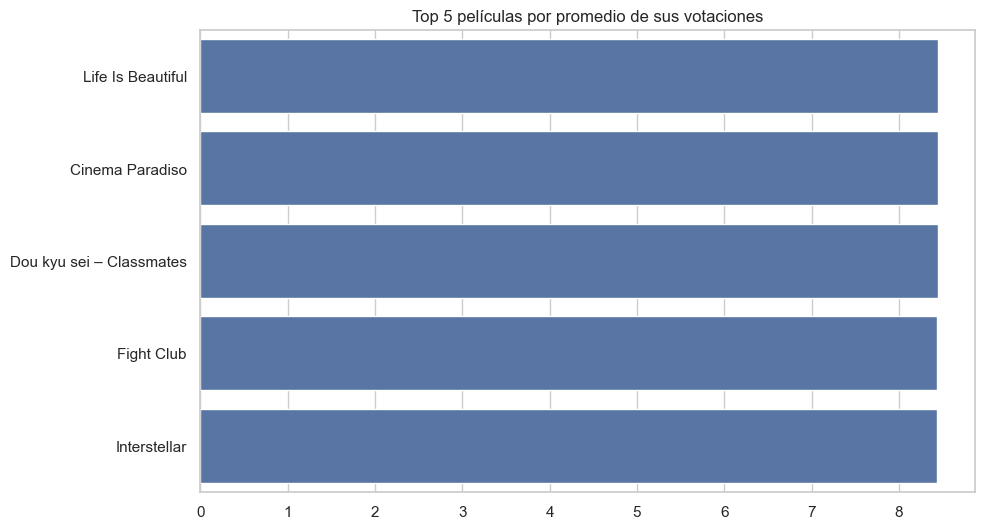

In [ ]:
top_votes = df.sort_values("vote_average", ascending=False).head(5)

sns.barplot(
    data=top_votes,
    y="title",
    x="vote_average"
)

plt.title("Top 5 películas por promedio de sus votaciones")
plt.xlabel("")
plt.ylabel("")
plt.show()


#### Películas con mejor popularidad

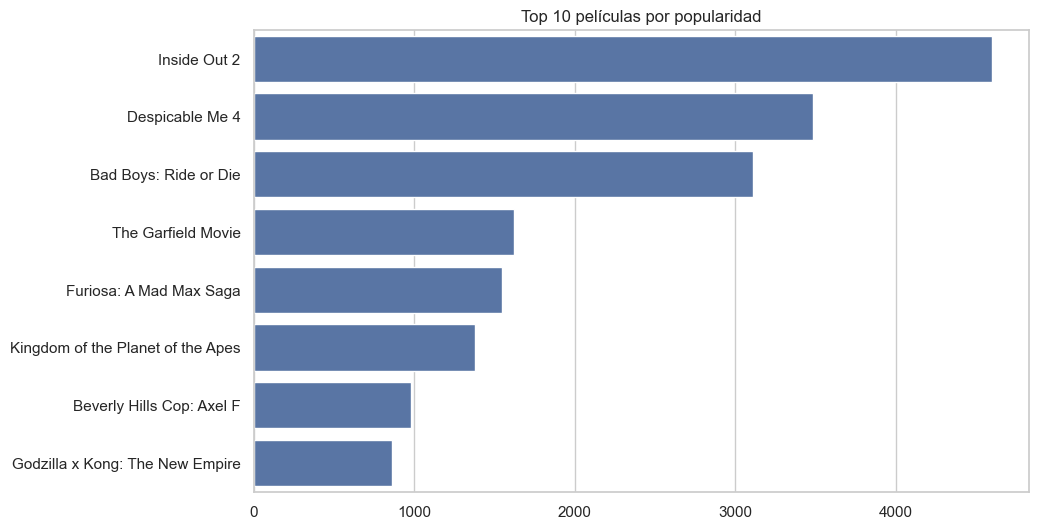

In [ ]:
top_votes = df.sort_values("popularity", ascending=False).head(10)

sns.barplot(
    data=top_votes,
    y="title",
    x="popularity"
)

plt.title("Top 10 películas por popularidad")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Análisis Temporal

Primero analicemos por rating las películas que se encuentran de cada año

In [ ]:
movies_per_year = df["year"].value_counts().sort_index()


In [ ]:
rating_per_year = df.groupby("year")["vote_average"].mean()

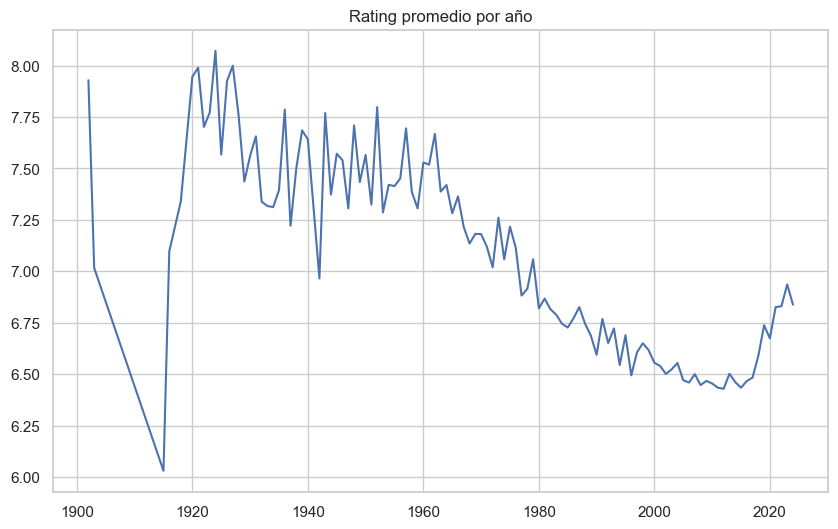

In [ ]:
plt.figure()
rating_per_year.plot()
plt.title("Rating promedio por año")
plt.xlabel("")
plt.ylabel("")
plt.show()


Ahora veamos si encontramos algo interesante en la relación entre rating y década

In [ ]:
df["decade"] = (df["year"] // 10) * 10


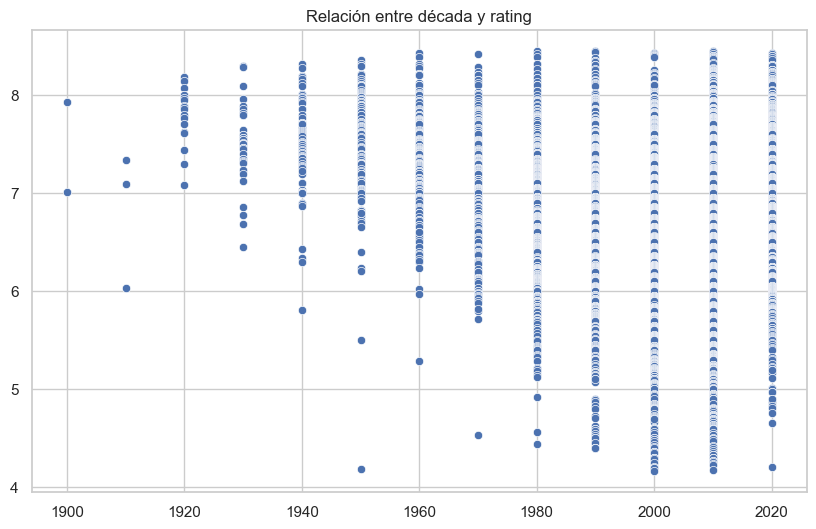

In [ ]:
sns.scatterplot(data=df, x="decade", y="vote_average", alpha=1)
plt.title("Relación entre década y rating")
plt.xlabel("")
plt.ylabel("")
plt.show()



## Películas relacionadas con México

#### En esta sección buscaremos las 10 mejores películas que puedan estar relacionadas a México. Filtraremos por texto de manera que en la reseña se seleccionen las que digan algo como Mexico, mexican, mexico, etc.  

In [ ]:
mexico_movies = df[df["overview"].str.contains("mexic", case=False, na=False)]


In [ ]:
mexico_movies

,id,title,release_date,overview,popularity,vote_average,vote_count,year,decade
5,1058694,Radical,2023-10-19,"In a Mexican border town plagued by neglect, c...",48.181,8.433,382,2023,2020
85,654299,Out of the Clear Blue Sky,2019-12-24,"Returning to Earth as an imitator, the legenda...",23.323,8.219,338,2019,2010
237,800,The Young and the Damned,1950-12-09,A group of juvenile delinquents live a violent...,22.349,8.036,460,1950,1950
294,3090,The Treasure of the Sierra Madre,1948-01-15,"Fred C. Dobbs and Bob Curtin, both down on the...",25.957,7.984,1155,1948,1940
355,626332,Flamin' Hot,2023-03-11,"The inspiring true story of Richard Montañez, ...",41.200,7.931,567,2023,2020
...,...,...,...,...,...,...,...,...,...
8368,9038,The Heartbreak Kid,2007-10-05,"Eddie, the 40-year-old confirmed bachelor fina...",36.676,5.729,1565,2007,2000
8404,144789,I'm So Excited!,2013-03-08,Something has gone wrong with the landing gear...,21.343,5.713,662,2013,2010
8704,9793,The Hills Have Eyes 2,2007-03-22,A group of National Guard trainees on a routin...,49.534,5.600,1398,2007,2000
8993,14405,Beverly Hills Chihuahua,2008-10-03,A pampered Beverly Hills chihuahua named Chloe...,37.053,5.350,1027,2008,2000


In [ ]:
top10_mexico = (
    mexico_movies
    .sort_values("vote_average", ascending=False)
    .head(10)
)



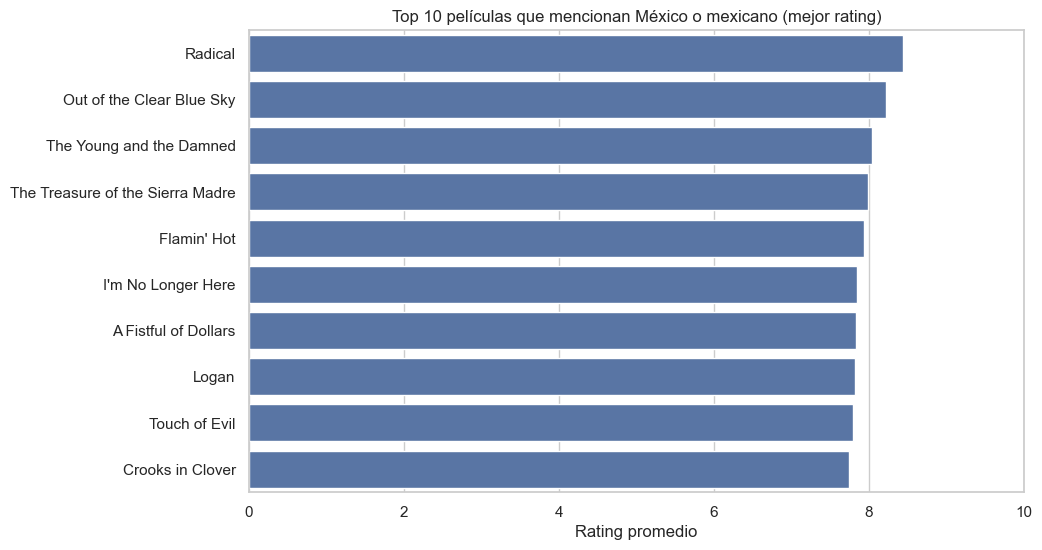

In [ ]:
plt.figure()

sns.barplot(
    data=top10_mexico,
    y="title",
    x="vote_average"
)

plt.title("Top 10 películas que mencionan México o mexicano (mejor rating)")
plt.xlabel("Rating promedio")
plt.ylabel("")
plt.xlim(0, 10)

plt.show()


## Conclusiones

Las pel{i}culas 